###Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv("train.csv")

In [ ]:
df.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


###Filling Missing Values

In [ ]:
df = df.fillna(method = "pad", limit =1)
df = df.fillna(method = "bfill", limit =1)
df = df.fillna(method = "pad", limit =1)
df = df.fillna(method = "bfill", limit =1)
df.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

In [ ]:
y= df["Transported"]
x = df.drop("Transported",axis =1)

In [ ]:
y.isna().sum()

0

###Preprocessing

In [ ]:
df["Cabin"].nunique()

6560

In [ ]:
len(df["Cabin"])

8693

In [ ]:
dfn = pd.DataFrame()
c1 = []
c2 = []
c3 = []

In [ ]:
for i in range(len(df["Cabin"])):
  c1 += df["Cabin"][i]. split("/")[0]
  c2.append(df["Cabin"][i]. split("/")[1])

  c3 += df["Cabin"][i]. split("/")[2]
print(len(c2),len(c1),len(c3))

8693 8693 8693


In [ ]:
dfn["cabin1"] = c1
dfn["cabin2"] = c2
dfn["cabin3"] = c3
dfn.nunique()

cabin1       8
cabin2    1817
cabin3       2
dtype: int64

In [ ]:
dfn.head()

,cabin1,cabin2,cabin3
0,B,0,P
1,F,0,S
2,A,0,S
3,A,0,S
4,F,1,S


In [ ]:
dfn["cabin1"].value_counts()

F    2847
G    2625
E     897
B     804
C     764
D     485
A     266
T       5
Name: cabin1, dtype: int64

In [ ]:
for i in range(len(dfn["cabin1"])):
  if dfn["cabin1"][i] == "A":
    dfn["cabin1"][i] = 0
  if dfn["cabin1"][i] == "B":
    dfn["cabin1"][i] = 1
  if dfn["cabin1"][i] == "C":
    dfn["cabin1"][i] = 2
  if dfn["cabin1"][i] == "D":
    dfn["cabin1"][i] = 3
  if dfn["cabin1"][i] == "E":
    dfn["cabin1"][i] = 4        
  if dfn["cabin1"][i] == "F":
    dfn["cabin1"][i] = 5
  if dfn["cabin1"][i] == "G":
    dfn["cabin1"][i] = 6
  if dfn["cabin1"][i] == "T":
    dfn["cabin1"][i] = 7

In [ ]:
dfn["cabin1"].nunique()

8

In [ ]:
for i in range(len(dfn["cabin3"])):
  if dfn["cabin3"][i] == "P":
    dfn["cabin3"][i] = 0
  else:
    dfn["cabin3"][i] = 1
dfn["cabin3"].nunique()

2

In [ ]:
c=[]
for i in range(len(dfn["cabin1"])):
  c.append(int(str(dfn["cabin1"][i])+dfn["cabin2"][i]+str(dfn["cabin3"][i])))

In [ ]:
dfn["Cabin"]= c

In [ ]:
dfn.head()

,cabin1,cabin2,cabin3,Cabin
0,1,0,0,100
1,5,0,1,501
2,0,0,1,1
3,0,0,1,1
4,5,1,1,511


In [ ]:
x["Cabin"]=dfn["Cabin"]

In [ ]:
x["HomePlanet"].unique()
for i in range(len(x["HomePlanet"])):
  if x["HomePlanet"][i] == 'Europa':
    x["HomePlanet"][i] = 0
  elif x["HomePlanet"][i] == 'Earth':
    x["HomePlanet"][i] = 1
  else:
    x["HomePlanet"][i] = 2

<ipython-input-22-392635d628ce>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["HomePlanet"][i] = 0
<ipython-input-22-392635d628ce>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["HomePlanet"][i] = 1
<ipython-input-22-392635d628ce>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["HomePlanet"][i] = 2


In [ ]:
x["Destination"].unique()
for i in range(len(x["Destination"])):
  if x["Destination"][i] == 'TRAPPIST-1e':
    x["Destination"][i] = 0
  elif x["Destination"][i] == '55 Cancri e':
    x["Destination"][i] = 1
  else:
    x["Destination"][i] = 2

<ipython-input-23-b07466b4b96e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Destination"][i] = 0
<ipython-input-23-b07466b4b96e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Destination"][i] = 2
<ipython-input-23-b07466b4b96e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["Destination"][i] = 1


In [ ]:
y.head()

0    False
1     True
2    False
3    False
4     True
Name: Transported, dtype: bool

In [ ]:
x_train = x.iloc[:, 1:-1]

In [ ]:
x_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,False,100,0,39.0,False,0.0,0.0,0.0,0.0,0.0
1,1,False,501,0,24.0,False,109.0,9.0,25.0,549.0,44.0
2,0,False,1,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,0,False,1,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,1,False,511,0,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,False,980,1,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,1,True,614991,2,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,1,False,615001,0,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,0,False,46081,1,32.0,False,0.0,1049.0,0.0,353.0,3235.0


###training and val

In [ ]:
Y= df["Transported"]

In [ ]:
Y.shape[0]*0.80

6954.400000000001

In [ ]:
y_train = Y.iloc[:6954,].values
y_test = Y.iloc[6954:,].values

In [ ]:
x_training = x_train.iloc[:6954,].values
x_testing = x_train.iloc[6954:,].values

In [ ]:
x_testing

array([[1, True, 611981, ..., 0.0, 0.0, 0.0],
       [1, False, 611900, ..., 0.0, 586.0, 10.0],
       [1, True, 611910, ..., 0.0, 586.0, 0.0],
       ...,
       [1, False, 615001, ..., 1872.0, 1.0, 0.0],
       [0, False, 46081, ..., 0.0, 353.0, 3235.0],
       [0, False, 46081, ..., 0.0, 0.0, 12.0]], dtype=object)

###Normalizing the values

In [ ]:
x_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,False,100,0,39.0,False,0.0,0.0,0.0,0.0,0.0
1,1,False,501,0,24.0,False,109.0,9.0,25.0,549.0,44.0
2,0,False,1,0,58.0,True,43.0,3576.0,0.0,6715.0,49.0
3,0,False,1,0,33.0,False,0.0,1283.0,371.0,3329.0,193.0
4,1,False,511,0,16.0,False,303.0,70.0,151.0,565.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
8688,0,False,980,1,41.0,True,0.0,6819.0,0.0,1643.0,74.0
8689,1,True,614991,2,18.0,False,0.0,0.0,0.0,0.0,0.0
8690,1,False,615001,0,26.0,False,0.0,0.0,1872.0,1.0,0.0
8691,0,False,46081,1,32.0,False,0.0,1049.0,0.0,353.0,3235.0


In [ ]:
sc = StandardScaler().fit(x_train)
Xtrain = sc.transform(x_train)

In [ ]:
Xtrain

array([[-1.4169883 , -0.74635661, -0.73644864, ..., -0.28692703,
        -0.2741202 , -0.26512078],
       [ 0.06495098, -0.74635661, -0.73466746, ..., -0.24517477,
         0.20908429, -0.2268629 ],
       [-1.4169883 , -0.74635661, -0.73688839, ..., -0.28692703,
         5.63611322, -0.22251541],
       ...,
       [ 0.06495098, -0.74635661,  1.99485934, ...,  2.83948227,
        -0.27324005, -0.26512078],
       [-1.4169883 , -0.74635661, -0.53220719, ..., -0.28692703,
         0.03657413,  2.54770322],
       [-1.4169883 , -0.74635661, -0.53220719, ..., -0.28692703,
        -0.2741202 , -0.25468681]])

###Models and Training

####xgboost

In [ ]:
import xgboost as xgb

In [ ]:
params = {'booster': 'gbtree',  
      'max_depth': 50, 'learning_rate': .02, 'n_estimators': 1024,    'min_child_weight': 1, 'colsample_bytree': .9,
      'subsample': .8, 'gamma': 0}

In [ ]:
model = xgb.XGBClassifier(params= params)

In [ ]:
model.fit(Xtrain, y)

XGBClassifier(params={'booster': 'gbtree', 'colsample_bytree': 0.9, 'gamma': 0,
                      'learning_rate': 0.02, 'max_depth': 50,
                      'min_child_weight': 1, 'n_estimators': 1024,
                      'subsample': 0.8})

####Random Forest

In [ ]:
clf = RandomForestClassifier(criterion="entropy",n_estimators=100,max_depth=50, min_samples_split= 5)

In [ ]:
clf.fit(Xtrain, y)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=5)

###Loading Test data

In [ ]:
dft = pd.read_csv("test.csv")

In [ ]:
dft.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


###Filling NAN values in Test Data

In [ ]:
dft = dft.fillna(method = "pad", limit =1)

In [ ]:
dft = dft.fillna(method = "pad", limit =1)
dft.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       1
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

In [ ]:
dft = dft.fillna(method = "bfill", limit =1)
dft.isna().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
dtype: int64

###Preprocessing Test Data

In [ ]:
xt = dft.iloc[:, 1:-1]

In [ ]:
xt.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
c1, c2, c3 = [],[],[]


In [ ]:
for i in range(len(dft["Cabin"])):
  c1 += dft["Cabin"][i]. split("/")[0]
  c2.append(dft["Cabin"][i]. split("/")[1])

  c3 += dft["Cabin"][i]. split("/")[2]
print(len(c2),len(c1),len(c3))

4277 4277 4277


In [ ]:
dfnn = pd.DataFrame()

In [ ]:
dfnn["cabin1"]= c1

In [ ]:
dfnn["cabin2"]= c2

In [ ]:
dfnn["cabin3"]= c3

In [ ]:
dfnn.head()

,cabin1,cabin2,cabin3
0,G,3,S
1,F,4,S
2,C,0,S
3,C,1,S
4,F,5,S


In [ ]:
dfnn["cabin3"].value_counts()

S    2148
P    2129
Name: cabin3, dtype: int64

In [ ]:
for i in range(len(dfnn["cabin1"])):
  if dfnn["cabin1"][i] == "A":
    dfnn["cabin1"][i] = 0
  elif dfnn["cabin1"][i] == "B":
    dfnn["cabin1"][i] = 1
  elif dfnn["cabin1"][i] == "C":
    dfnn["cabin1"][i] = 2
  elif dfnn["cabin1"][i] == "D":
    dfnn["cabin1"][i] = 3
  elif dfnn["cabin1"][i] == "E":
    dfnn["cabin1"][i] = 4        
  elif dfnn["cabin1"][i] == "F":
    dfnn["cabin1"][i] = 5
  elif dfnn["cabin1"][i] == "G":
    dfnn["cabin1"][i] = 6
  elif dfnn["cabin1"][i] == "T":
    dfnn["cabin1"][i] = 7

In [ ]:
dfnn.head()

,cabin1,cabin2,cabin3
0,6,3,S
1,5,4,S
2,2,0,S
3,2,1,S
4,5,5,S


In [ ]:
for i in range(len(dfnn["cabin3"])):
  if dfnn["cabin3"][i] == "P":
    dfnn["cabin3"][i] = 0
  else:
    dfnn["cabin3"][i] = 1
dfnn["cabin3"].nunique()

2

In [ ]:
c=[]
for i in range(len(dfnn["cabin1"])):
  c.append(int(str(dfnn["cabin1"][i])+dfnn["cabin2"][i]+str(dfnn["cabin3"][i])))

In [ ]:
dfnn["Cabin"]= c

In [ ]:
xt["Cabin"] = dfnn["Cabin"]

In [ ]:
xt.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,True,631,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0
1,Earth,False,541,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,Europa,True,201,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0
3,Europa,False,211,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,Earth,False,551,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0


In [ ]:
xt["HomePlanet"].unique()
for i in range(len(xt["HomePlanet"])):
  if xt["HomePlanet"][i] == 'Europa':
    xt["HomePlanet"][i] = 0
  elif xt["HomePlanet"][i] == 'Earth':
    xt["HomePlanet"][i] = 1
  else:
    xt["HomePlanet"][i] = 2

<ipython-input-63-bee90d1ec9ea>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt["HomePlanet"][i] = 1
<ipython-input-63-bee90d1ec9ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt["HomePlanet"][i] = 0
<ipython-input-63-bee90d1ec9ea>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt["HomePlanet"][i] = 2


In [ ]:
xt["Destination"].unique()
for i in range(len(xt["Destination"])):
  if xt["Destination"][i] == 'TRAPPIST-1e':
    xt["Destination"][i] = 0
  elif xt["Destination"][i] == '55 Cancri e':
    xt["Destination"][i] = 1
  else:
    xt["Destination"][i] = 2

<ipython-input-64-30a77a8781a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt["Destination"][i] = 0
<ipython-input-64-30a77a8781a8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt["Destination"][i] = 1
<ipython-input-64-30a77a8781a8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt["Destination"][i] = 2


In [ ]:
xt.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,True,631,0,27.0,False,0.0,0.0,0.0,0.0,0.0
1,1,False,541,0,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0,True,201,1,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0,False,211,0,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,1,False,551,0,20.0,False,10.0,0.0,635.0,0.0,0.0


In [ ]:
xt.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,True,631,0,27.0,False,0.0,0.0,0.0,0.0,0.0
1,1,False,541,0,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0,True,201,1,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0,False,211,0,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,1,False,551,0,20.0,False,10.0,0.0,635.0,0.0,0.0


In [ ]:
xt.isna().sum()

HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [ ]:
xt.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,1,True,631,0,27.0,False,0.0,0.0,0.0,0.0,0.0
1,1,False,541,0,19.0,False,0.0,9.0,0.0,2823.0,0.0
2,0,True,201,1,31.0,False,0.0,0.0,0.0,0.0,0.0
3,0,False,211,0,38.0,False,0.0,6652.0,0.0,181.0,585.0
4,1,False,551,0,20.0,False,10.0,0.0,635.0,0.0,0.0


###Normalizing Test Data

In [ ]:
sc = StandardScaler().fit(xt)
Xtest = sc.transform(xt)

###Predicting Values

In [ ]:
Fval = clf.predict(Xtest)

In [ ]:
Fval = model.predict(Xtest)

In [ ]:
f1= pd.DataFrame()
f1["PassengerId"] = dft["PassengerId"]
f1["Transported"] = Fval

In [ ]:
f1.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False


In [ ]:
f1.to_csv("submission.csv", index=False)

###Modelling and Evaluating using validation

In [ ]:
sc = StandardScaler().fit(x_training)
x_training = sc.transform(x_training)

In [ ]:
sc = StandardScaler().fit(x_testing)
x_testing = sc.transform(x_testing)

In [ ]:
model.fit(x_training,y_train)

XGBClassifier(params={'booster': 'gbtree', 'colsample_bytree': 0.9, 'gamma': 0,
                      'learning_rate': 0.02, 'max_depth': 50,
                      'min_child_weight': 1, 'n_estimators': 1024,
                      'subsample': 0.8})

In [ ]:
y_pred=model.predict(x_testing)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[639, 272],
       [ 97, 731]])

In [ ]:
accuracy_score(y_test,y_pred)

0.7878090856814262

In [ ]:
clf.fit(x_training, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, min_samples_split=5)

In [ ]:
y_pred = clf.predict(x_testing)

###Corelation

In [ ]:
from scipy.stats import pearsonr
pearsonr(df["VIP"], df["Transported"])

(-0.03455998356164466, 0.001269694797703557)

In [ ]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


###NN Pytorch

In [ ]:
import torch
import numpy as np


In [ ]:
Xtrain

array([[-1.4169883 , -0.74635661, -0.73644864, ..., -0.28692703,
        -0.2741202 , -0.26512078],
       [ 0.06495098, -0.74635661, -0.73466746, ..., -0.24517477,
         0.20908429, -0.2268629 ],
       [-1.4169883 , -0.74635661, -0.73688839, ..., -0.28692703,
         5.63611322, -0.22251541],
       ...,
       [ 0.06495098, -0.74635661,  1.99485934, ...,  2.83948227,
        -0.27324005, -0.26512078],
       [-1.4169883 , -0.74635661, -0.53220719, ..., -0.28692703,
         0.03657413,  2.54770322],
       [-1.4169883 , -0.74635661, -0.53220719, ..., -0.28692703,
        -0.2741202 , -0.25468681]])

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader 

In [ ]:
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]  
  def __len__(self):
    return self.length

trainset = dataset(Xtrain,y)#DataLoader

In [ ]:
trainloader = DataLoader(trainset,batch_size=32,shuffle=False)

In [ ]:
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,32)
    self.fc2 = nn.Linear(32,64)
    self.fc3 = nn.Linear(64,1)  
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [ ]:
#hyper parameters
learning_rate = 0.1
epochs = 1000
# Model , Optimizer, Loss
model = Net(input_shape=Xtrain.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [ ]:
#forward loop
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(Xtrain,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()   
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
  if i%50 == 0:
    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 0.6684965491294861	 accuracy : 0.7855746002530772
epoch 50	loss : 0.5759660005569458	 accuracy : 0.7976532842516968
epoch 100	loss : 0.523246705532074	 accuracy : 0.7967330035660877
epoch 150	loss : 0.5023242831230164	 accuracy : 0.7928218106522489
epoch 200	loss : 0.473757803440094	 accuracy : 0.793742091337858
epoch 250	loss : 0.4508301019668579	 accuracy : 0.7927067755665478
epoch 300	loss : 0.43925872445106506	 accuracy : 0.7946623720234671
epoch 350	loss : 0.4424782395362854	 accuracy : 0.7985735649373059
epoch 400	loss : 0.4370109438896179	 accuracy : 0.7984585298516047
epoch 450	loss : 0.44734692573547363	 accuracy : 0.799493845622915
epoch 500	loss : 0.4344780743122101	 accuracy : 0.7979983895088002
epoch 550	loss : 0.4357796311378479	 accuracy : 0.8015644771655355
epoch 600	loss : 0.4135824739933014	 accuracy : 0.8001840561371218
epoch 650	loss : 0.4182334542274475	 accuracy : 0.8017945473369378
epoch 700	loss : 0.40091434121131897	 accuracy : 0.8016795122512367

RuntimeError: ignored

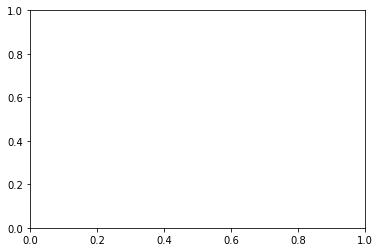

In [ ]:
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

Text(0, 0.5, 'loss')

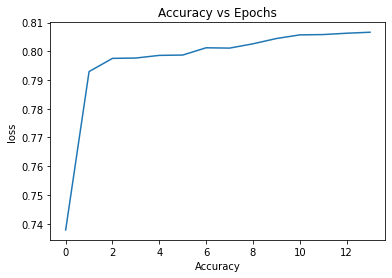

In [ ]:
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

In [ ]:
final = model(torch.tensor(Xtest,dtype=torch.float32))

In [ ]:
final = final.detach().numpy()

In [ ]:
final[:5
    ]

array([[0.57060844],
       [0.01260787],
       [0.9983083 ],
       [0.998531  ],
       [0.6807676 ]], dtype=float32)

In [ ]:
for i in range(final.shape[0]):
  if final[i]>0.1:
    final[i] = False
  else:
    final[i] = True

In [ ]:
final[0] = False
final

array([[0.],
       [1.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
bool(final[2])

False

In [ ]:
f=[]
for i in range(final.shape[0]):
  f.append(bool(final[i]))

In [ ]:
fn = pd.DataFrame()

In [ ]:
fn["PassengerId"]= dft["PassengerId"]

In [ ]:
fn["Transported"]= f

In [ ]:
fn.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,True
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [ ]:
fn.to_csv("sub1.csv", index=False)